<a href="https://colab.research.google.com/github/maddara88/Deep_Learning_Project_Work/blob/main/Cat_Dog_Image_Using_ImageDataGenerators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import kaggle

In [ ]:
! mv kaggle.json /root/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#! unzip -q dogs-vs-cats.zip

In [ ]:
#! unzip -q train.zip

In [ ]:
# Image Data Generator has a specific format for aliging images 
# Master_Folder
#   Category_1
#       Image_11
#       Image_12
#       Image_13
#       ...
#   Category_2
#     Image_21
#     Image_22
#     Image_23
#     ... 


# Master_data
#|-  Cat
#     cat_image_1.jpg
#     cat_image_2.jpg
#     ...
#|-  Dog
#     dog_image_1.jpg
#     dog_image_2.jpg

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2,os

In [ ]:
# creating folder structure
# os.mkdir("master_data")
# os.mkdir("master_data/cat")
# os.mkdir("master_data/dog")


In [ ]:
# copy these files from train folder and paste them in CAT or DOG folder accordingly

src_folder = "train/"
dest_cat = "master_data/cat"
dest_dog = "master_data/dog"

import shutil #python library which will help us in copying files

In [ ]:
# iterate over the train folder
for filename in os.listdir(src_folder):
  if "dog" in filename:
    shutil.copy(src_folder + filename,dest_dog)
  else:
    shutil.copy(src_folder + filename,dest_cat)

In [ ]:
os.listdir("master_data")

['dog', 'cat']

In [ ]:
len(os.listdir(dest_dog))

12500

In [ ]:
len(os.listdir(dest_cat))

12500

In [ ]:
batch_size =128

In [ ]:
#scaling the images
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.1,rescale =1/255.0)

In [ ]:
#Resizing the image to 150,150
train_idg = idg.flow_from_directory(directory = "master_data",target_size = (150,150),batch_size = batch_size,subset = "training")


Found 22500 images belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_directory(directory = "master_data",target_size = (150,150),batch_size = batch_size,subset = "validation")

Found 2500 images belonging to 2 classes.


In [ ]:
# #creating our model
# #del model
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Input((150,150,3),name = "Input"))
# model.add(tf.keras.layers.Flatten(name = "Flatten"))
# model.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.relu,name = "Hidden_Layer"))
# model.add(tf.keras.layers.Dense(2,activation = tf.keras.activations.softmax,name = "Output_Layer"))

In [ ]:
# model.summary()

In [ ]:
# model.compile(optimizer = tf.keras.optimizers.SGD(),loss = tf.keras.losses.categorical_crossentropy,metrics = ["acc"])

In [ ]:
# model.fit(train_idg,batch_size = batch_size,epochs = 10,validation_data=val_idg)

In [ ]:
# so here im gonna make a function where we just have to put the image locatoin and it should predict with accuracy if its a dog or a cat

In [ ]:
#creating our model
#del model2
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input((150,150,3),name = "Input"))
model2.add(tf.keras.layers.Flatten(name = "Flatten"))

model2.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.relu,name = "Hidden_Layer1"))
model2.add(tf.keras.layers.Dense(200,activation = tf.keras.activations.relu,name = "Hidden_Layer2"))
model2.add(tf.keras.layers.Dense(300,activation = tf.keras.activations.relu,name = "Hidden_Layer3"))

model2.add(tf.keras.layers.Dense(2,activation = tf.keras.activations.softmax,name = "Output_Layer"))

model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),loss = tf.keras.losses.categorical_crossentropy,metrics = ["acc"])

model2.fit(train_idg,batch_size = batch_size,epochs = 10,validation_data=val_idg)

Epoch 1/10
176/176 [==============================] - 107s 606ms/step - loss: 0.6862 - acc: 0.5530 - val_loss: 0.6955 - val_acc: 0.5588
Epoch 2/10
176/176 [==============================] - 108s 611ms/step - loss: 0.6668 - acc: 0.5909 - val_loss: 0.6585 - val_acc: 0.6024
Epoch 3/10
176/176 [==============================] - 105s 594ms/step - loss: 0.6563 - acc: 0.6130 - val_loss: 0.6603 - val_acc: 0.6052
Epoch 4/10
176/176 [==============================] - 101s 571ms/step - loss: 0.6485 - acc: 0.6216 - val_loss: 0.6559 - val_acc: 0.6148
Epoch 5/10
176/176 [==============================] - 102s 580ms/step - loss: 0.6409 - acc: 0.6289 - val_loss: 0.6486 - val_acc: 0.6164
Epoch 6/10
176/176 [==============================] - 104s 590ms/step - loss: 0.6359 - acc: 0.6369 - val_loss: 0.6571 - val_acc: 0.5992
Epoch 7/10
176/176 [==============================] - 104s 592ms/step - loss: 0.6281 - acc: 0.6447 - val_loss: 0.6369 - val_acc: 0.6232
Epoch 8/10
176/176 [============================

In [ ]:
def identify(x):
  pets = {0:"cat",1:"dog"}
  image = cv2.imread(x)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(150,150))
  print(plt.imshow(image))
  print(" ")
  #to convert our image to a 3d 
  image  = np.expand_dims(image,0)
  image = image/255.0
  y_pred = model2.predict(image)
  print((np.round(y_pred,2))*100)
  p = np.max((np.round(y_pred,2))*100)
  np.argmax((np.round(y_pred,2))*100)
  i = np.argmax((np.round(y_pred,2))*100)
  print(f"Hello sir, I'm {p}% sure that you have provided a picture of a {pets[i]} :)")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 103ms/step
[[74. 26.]]
Hello sir, I'm 74.0% sure that you have provided a picture of a cat :)


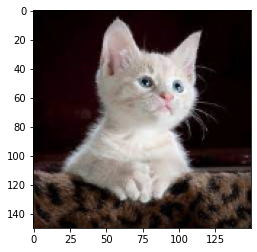

In [ ]:
identify("cat0.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 24ms/step
[[56. 44.]]
Hello sir, I'm 56.0% sure that you have provided a picture of a cat :)


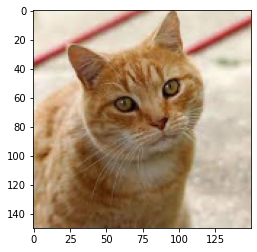

In [ ]:
identify("cat.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 23ms/step
[[25. 75.]]
Hello sir, I'm 75.0% sure that you have provided a picture of a dog :)


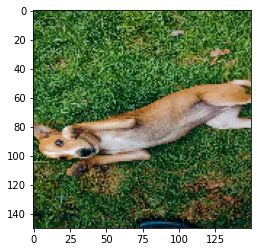

In [ ]:
identify("coco.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 53ms/step
[[17. 83.]]
Hello sir, I'm 83.0% sure that you have provided a picture of a dog :)


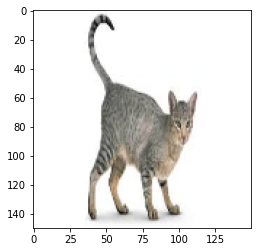

In [ ]:
identify("cat2.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 25ms/step
[[58.999996 41.      ]]
Hello sir, I'm 58.999996185302734% sure that you have provided a picture of a cat :)


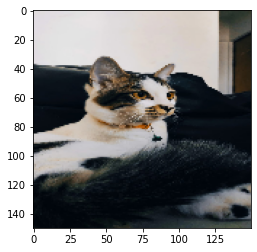

In [ ]:
identify("kaguya.jpg")

AxesImage(size=(150, 150))
 
1/1 [==============================] - 0s 51ms/step
[[14. 86.]]
Hello sir, I'm 86.0% sure that you have provided a picture of a dog :)


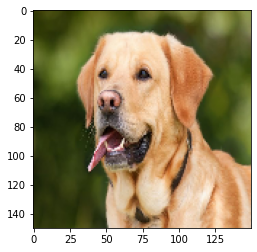

In [ ]:
identify("lab.jpg")